In [1]:
# import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
# load the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, sep=";")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [25]:
# check the shape of the dataframe

print("there are",df.shape[0], " rows and" , df.shape[1] , "columns in the dataframe . ")

there are 4898  rows and 12 columns in the dataframe . 


In [26]:
# check the size of the dataframe

print("Total entries in the datafrme is " ,df.size)

Total entries in the datafrme is  58776


In [27]:
## check the summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


- here we have the 12 columns
- first 11 columns are the chemical characteristics of the wine and it is in the float64 datatype .
- The last columns represent the quality of the wine , which is in between 3 to the 6 and it is in the int 64 datatype.   

In [29]:
# chenge the columns name replce the spaces with the underscore

df.columns = df.columns.str.replace(' ', '_')

df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [32]:
for col in df.columns:
    print(df[col].value_counts())

fixed_acidity
6.80     308
6.60     290
6.40     280
6.90     241
6.70     236
        ... 
14.20      1
4.50       1
6.45       1
3.80       1
3.90       1
Name: count, Length: 68, dtype: int64
volatile_acidity
0.280    263
0.240    253
0.260    240
0.250    231
0.220    229
        ... 
1.100      1
0.090      1
0.785      1
0.405      1
0.355      1
Name: count, Length: 125, dtype: int64
citric_acid
0.30    307
0.28    282
0.32    257
0.34    225
0.29    223
       ... 
1.66      1
0.99      1
1.23      1
0.86      1
0.11      1
Name: count, Length: 87, dtype: int64
residual_sugar
1.20     187
1.40     184
1.60     165
1.30     147
1.10     146
        ... 
2.65       1
2.35       1
4.35       1
8.55       1
18.40      1
Name: count, Length: 310, dtype: int64
chlorides
0.044    201
0.036    200
0.042    184
0.040    182
0.046    181
        ... 
0.209      1
0.271      1
0.120      1
0.212      1
0.136      1
Name: count, Length: 160, dtype: int64
free_sulfur_dioxide
29.0     160
31

- here we can see in the column quality the

- quality ----number of records
- 6 ----------2198
- 5 ----------1457
- 7 ----------880
- 8 ----------175
- 4 ----------163
- 3 ----------20
- 9 ----------5

- the data is imbalanced

In [9]:
# now check for the null values in the dataframe

df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


- there is no any null values in the dataframe.

In [11]:
# now check for the duplicates

df.duplicated().sum()

np.int64(937)

- There are 937 duplicated rows in the dataframe .
- we have to clear the duplicated data from the dataframe.

In [13]:
# drop the duplicate data

df=df.drop_duplicates()

# now check the duplicate rows

df.duplicated().sum()

np.int64(0)

- The dupplicated rows are cleared.

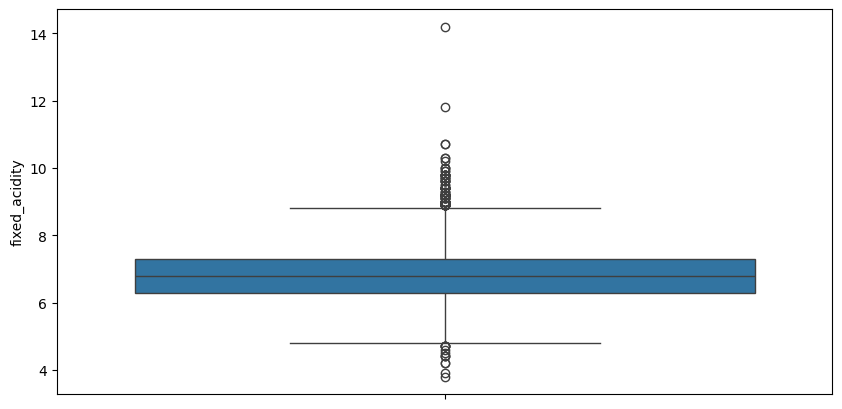

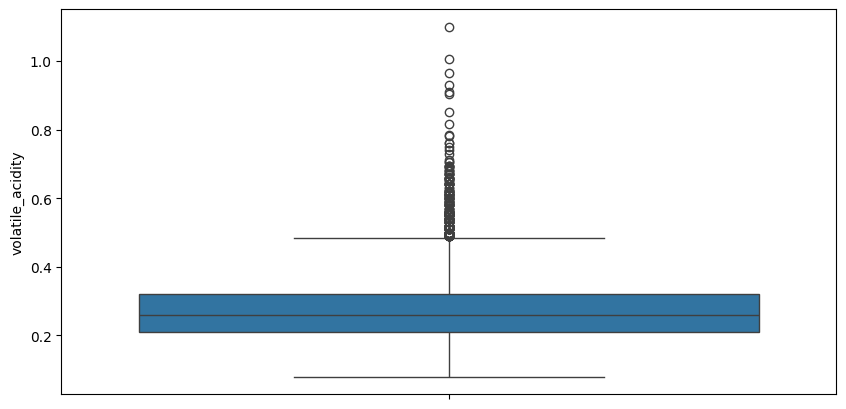

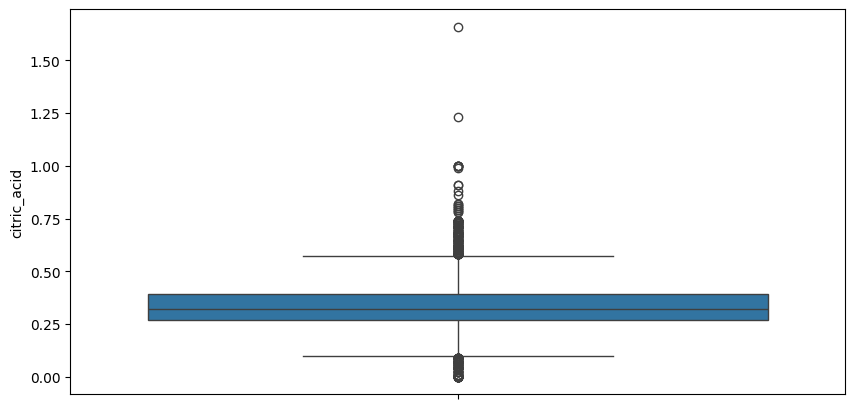

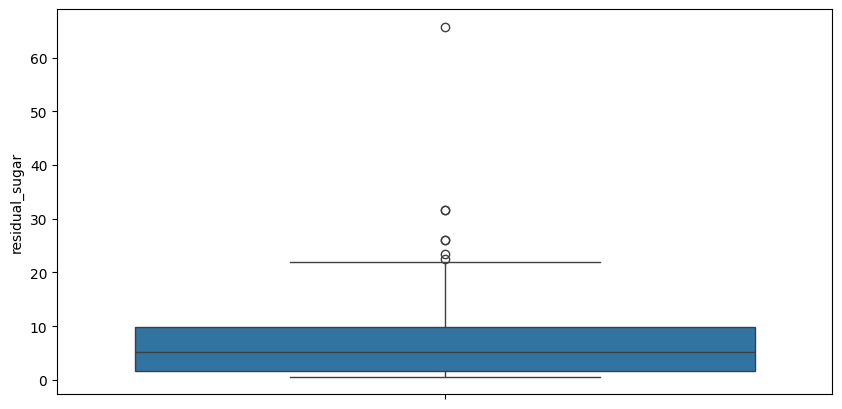

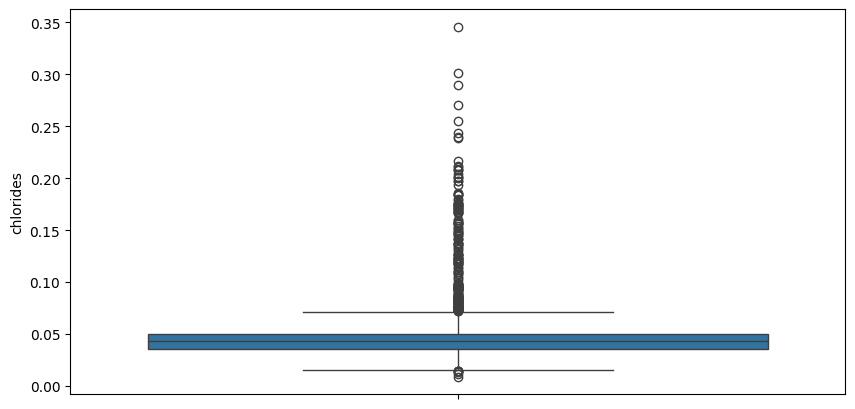

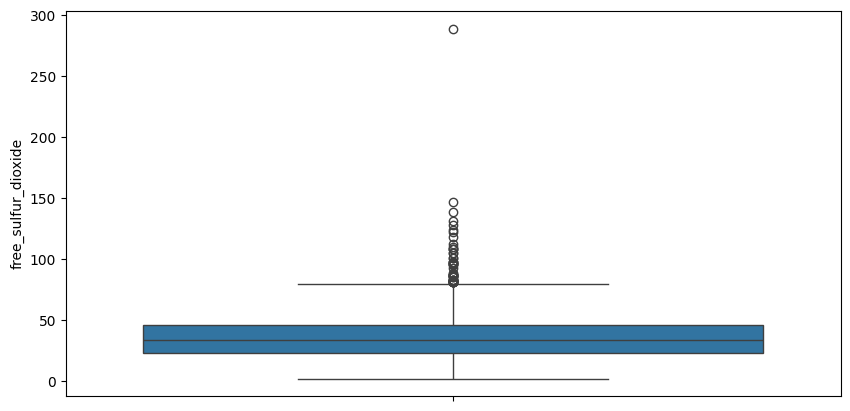

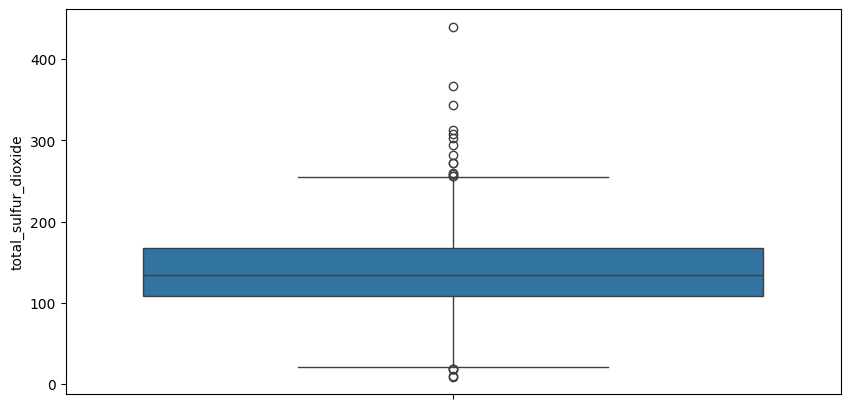

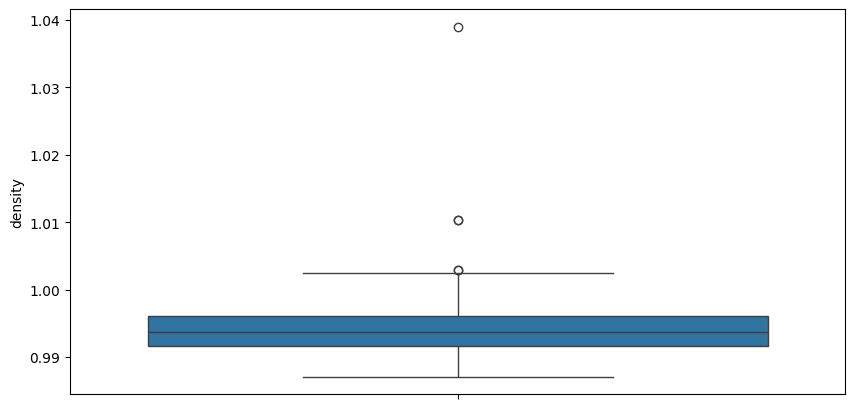

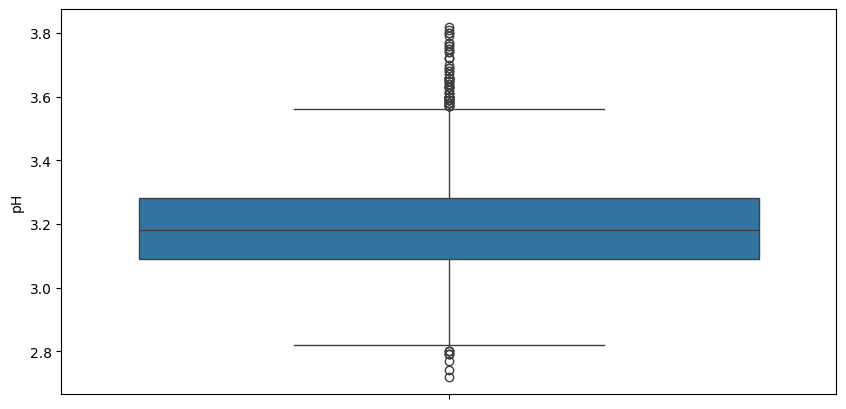

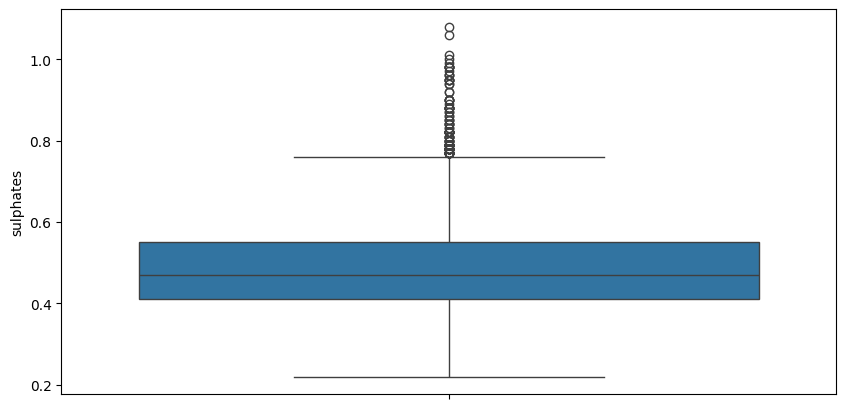

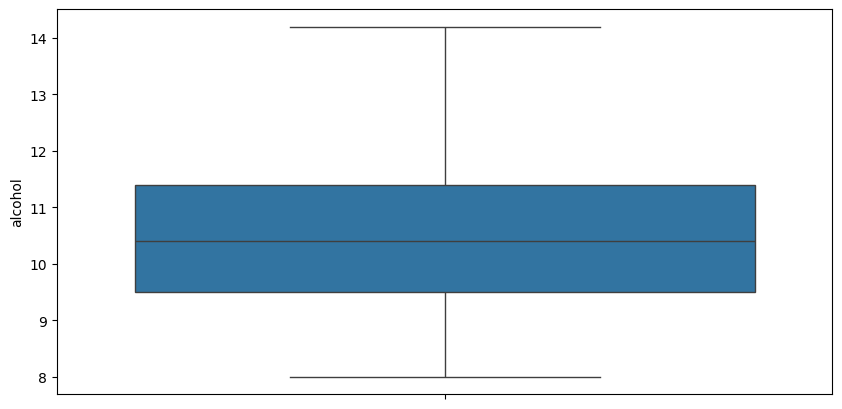

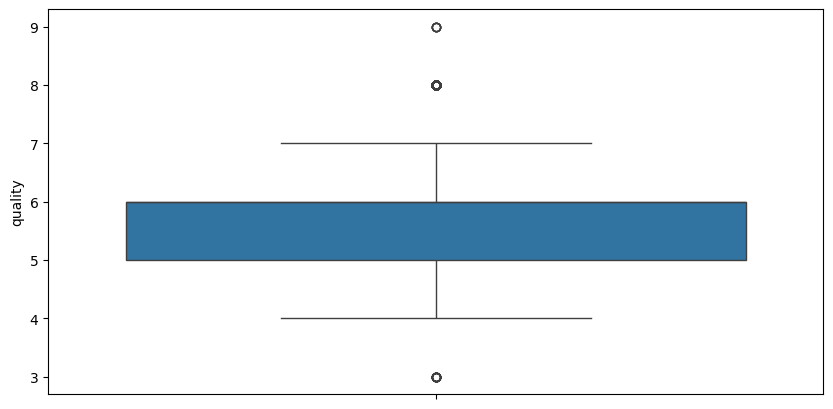

In [33]:
# now check for the outliers using the boxplot

for i in df.select_dtypes(include=np.number):
    plt.figure(figsize=(10,5))
    sns.boxplot(df[i])
    plt.show()
